In [1]:
import kagglehub
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

In [3]:
print(os.listdir(dataset))

['animals', 'images']


In [4]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [5]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [6]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [7]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

In [8]:
train_data = []  # A list to store the processed images and their corresponding labels

# Iterate through each category in the 'categories' list
for index, category in enumerate(categories):
    label = index  # Assign a unique label to each category based on its index
    path = os.path.join(dataset, category)  # Construct the path to the category folder
    images = os.listdir(path)  # Get the list of image filenames in the category folder
    random.shuffle(images)  # Shuffle the images randomly to ensure the dataset is mixed

    # Iterate through the first 100 images after shuffling
    for img in images[:100]:
        img_path = os.path.join(path, img)  # Construct the full path to the image file
        img_bgr = cv2.imread(img_path)  # Read the image in BGR format (default in OpenCV)

        # Convert the image from BGR to grayscale
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        # Resize the grayscale image to a fixed size (150x150 pixels)
        img_gray = cv2.resize(img_gray, (150, 150))

        # Append the processed grayscale image and its label to the train_data list
        train_data.append([img_gray, label])


In [9]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[0, 2, 0, 1, 0, 0, 2, 1, 1, 1]


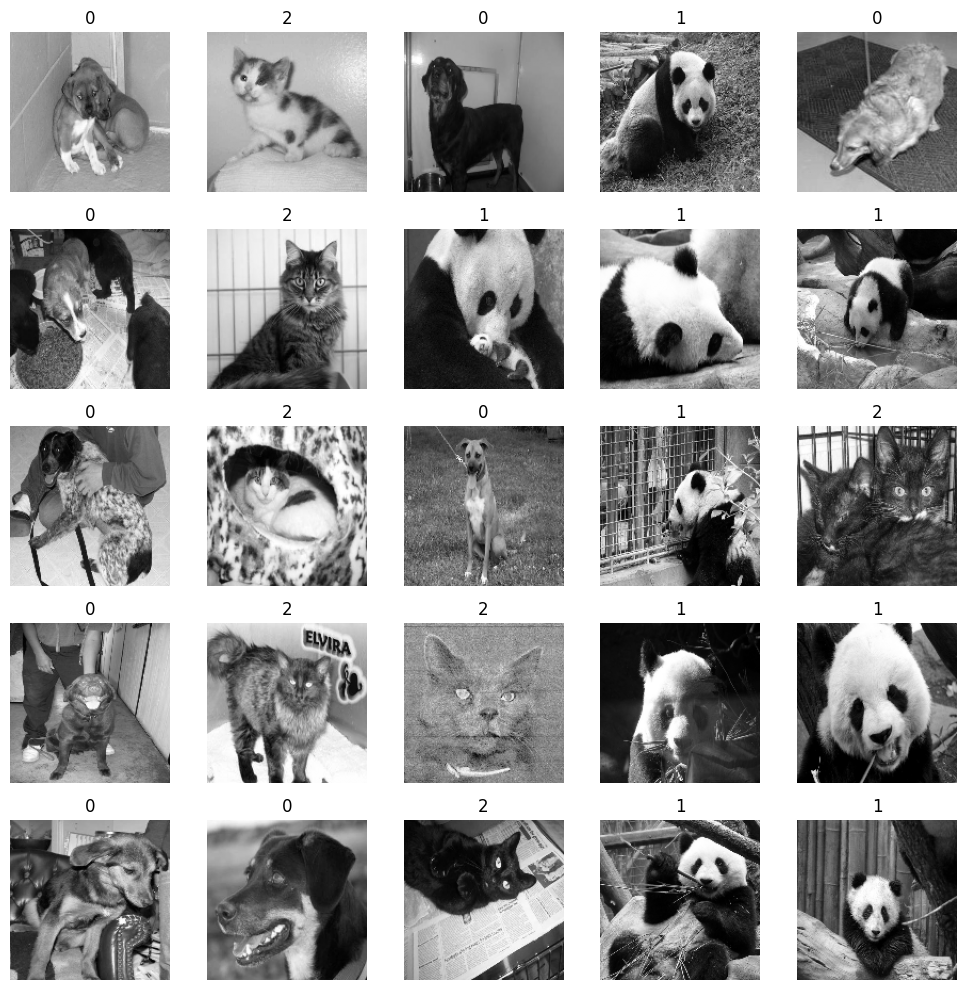

In [10]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
  if i < len(train_data):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)

5

5 folds cross validation mentioned in the instruction

In [12]:
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold from the list of folds
    labels = [label for _, label in fold]  # Extract the labels from each item in the current fold
    print(f"Fold {fold_index + 1}:")  # Display the current fold's number (starting from 1)
    print(f"Labels: {labels}")  # Output the list of labels for the current fold


Fold 1:
Labels: [0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1]
Fold 2:
Labels: [2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0]
Fold 3:
Labels: [0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0]
Fold 4:
Labels: [1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2]
Fold 5:
Labels: [0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0]


In [13]:
def l2_distance(valid_img, train_img):
    difference = valid_img - train_img  # Compute the element-wise difference between the two images
    squared_difference = np.square(difference)  # Square each difference element
    summed_squares = np.sum(squared_difference)  # Calculate the total sum of squared differences
    distance = np.sqrt(summed_squares)  # Compute the Euclidean distance by taking the square root of the sum
    return distance

def l1_distance(valid_img, train_img):
    difference = np.abs(valid_img - train_img)  # Compute the element-wise absolute difference between the images
    distance = np.sum(difference)  # Calculate the sum of all absolute differences to get the Manhattan distance
    return distance


In [14]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label


In [15]:
fold_accuracies_2 = []  # Initialize a list to store accuracies for each fold and each k value
avg_accuracies_2 = []  # Initialize a list to store the average accuracy for each k value

# Loop through different k values (from 1 to 30 for k-NN)
for k in range(1, 31):
    accuracies = []  # List to store accuracy for each fold for the current k value

    # Iterate over each fold for cross-validation (leave-one-out fold strategy)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the current fold as the validation set

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store predictions for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate the L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN algorithm to predict the label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Compare the predicted label with the actual label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (ratio of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the list of accuracies for each fold for the current k value
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy across all folds for the current k value
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Output the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")



K = 1:
  Average Accuracy: 0.36
  Fold Accuracies: [0.4166666666666667, 0.3, 0.35, 0.38333333333333336, 0.36666666666666664]

K = 2:
  Average Accuracy: 0.36
  Fold Accuracies: [0.4166666666666667, 0.3, 0.35, 0.38333333333333336, 0.36666666666666664]

K = 3:
  Average Accuracy: 0.38
  Fold Accuracies: [0.4166666666666667, 0.38333333333333336, 0.35, 0.38333333333333336, 0.36666666666666664]

K = 4:
  Average Accuracy: 0.40
  Fold Accuracies: [0.45, 0.38333333333333336, 0.38333333333333336, 0.43333333333333335, 0.35]

K = 5:
  Average Accuracy: 0.41
  Fold Accuracies: [0.45, 0.38333333333333336, 0.38333333333333336, 0.45, 0.38333333333333336]

K = 6:
  Average Accuracy: 0.43
  Fold Accuracies: [0.4, 0.4166666666666667, 0.38333333333333336, 0.5333333333333333, 0.4166666666666667]

K = 7:
  Average Accuracy: 0.43
  Fold Accuracies: [0.4666666666666667, 0.43333333333333335, 0.4, 0.48333333333333334, 0.36666666666666664]

K = 8:
  Average Accuracy: 0.42
  Fold Accuracies: [0.45, 0.4, 0.3666

In [16]:
fold_accuracies_1 = []  # Store fold accuracies for each k
avg_accuracies_1 = []  # Store average accuracy for each k

# Loop through k values (1 to 30)
for k in range(1, 31):
    accuracies = []  # List for fold accuracies

    # Cross-validation loop (leave-one-out)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Get validation set
        train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]  # Combine other folds as training set

        predictions = []  # Store predictions for the current fold

        # Validate each image
        for valid_img in valid_set:
            l1_distances = [(l1_distance(valid_img[0], train_img[0]), train_img[1]) for train_img in train_set]  # Calculate L1 distances
            l1_distances.sort()  # Sort distances
            predicted_label = knn_prediction(l1_distances, k)  # Predict label
            predictions.append(1 if predicted_label == valid_img[1] else 0)  # Compare prediction

        fold_accuracy = sum(predictions) / len(predictions)  # Calculate fold accuracy
        accuracies.append(fold_accuracy)

    fold_accuracies_1.append(accuracies)  # Store fold accuracies
    avg_accuracy = sum(accuracies) / len(accuracies)  # Calculate average accuracy
    avg_accuracies_1.append(avg_accuracy)

    # Print results
    print(f"K = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")
    print(f"  Fold Accuracies: {accuracies}")


K = 1:
  Average Accuracy: 0.41
  Fold Accuracies: [0.4, 0.38333333333333336, 0.4166666666666667, 0.5, 0.36666666666666664]
K = 2:
  Average Accuracy: 0.41
  Fold Accuracies: [0.4, 0.38333333333333336, 0.4166666666666667, 0.5, 0.36666666666666664]
K = 3:
  Average Accuracy: 0.40
  Fold Accuracies: [0.4166666666666667, 0.31666666666666665, 0.36666666666666664, 0.5, 0.4166666666666667]
K = 4:
  Average Accuracy: 0.38
  Fold Accuracies: [0.3333333333333333, 0.31666666666666665, 0.3333333333333333, 0.5, 0.4]
K = 5:
  Average Accuracy: 0.40
  Fold Accuracies: [0.45, 0.35, 0.43333333333333335, 0.5166666666666667, 0.25]
K = 6:
  Average Accuracy: 0.38
  Fold Accuracies: [0.43333333333333335, 0.3333333333333333, 0.38333333333333336, 0.5, 0.26666666666666666]
K = 7:
  Average Accuracy: 0.40
  Fold Accuracies: [0.48333333333333334, 0.35, 0.45, 0.4166666666666667, 0.3]
K = 8:
  Average Accuracy: 0.40
  Fold Accuracies: [0.48333333333333334, 0.35, 0.38333333333333336, 0.5, 0.3]
K = 9:
  Average Ac

In [17]:
print(len(fold_accuracies_1), len(fold_accuracies_2))

30 30


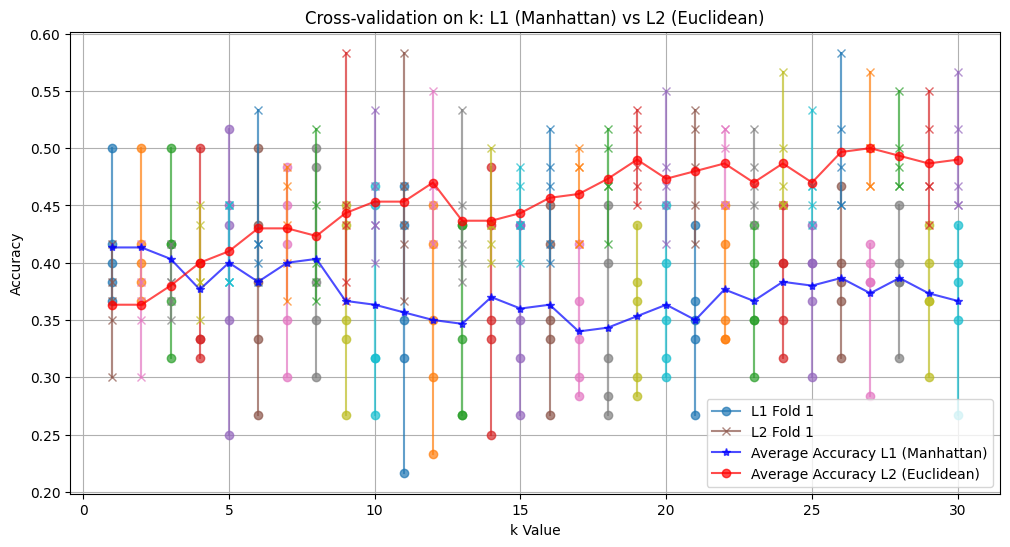

In [18]:
plt.figure(figsize=(12, 6))  # Set figure size

# Assuming fold_accuracies_l1, fold_accuracies_l2 store fold accuracies for L1 and L2
# And avg_accuracies_l1, avg_accuracies_l2 store average accuracies for L1 and L2

colors = plt.cm.tab10.colors  # Color map for plotting

# Loop to plot fold accuracies for both L1 and L2
for k in range(30):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2
plt.plot(range(1, 31), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='*')
plt.plot(range(1, 31), avg_accuracies_2, color='red', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')  # Title

# Show grid and legend
plt.grid(True)  # Display grid
plt.legend()  # Show legend

# Display the plot
plt.show()  # Show plot
